<a href="https://colab.research.google.com/github/Nisha-sah/Concepts-and-Technologies-of-AI/blob/main/Workshop_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Week - 2 - Describing the World with Data/Dataset/diabetes_.csv")
#Display the first 5 rows of the DataFrame
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#missing values
display(df.isnull().sum())


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#sumaaray
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#datatypes
display(df.dtypes)


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Week - 2 - Describing the World with Data/Dataset/diabetes_.csv")

df = df.dropna()

print("After dropping missing values, shape:", df.shape)

After dropping missing values, shape: (768, 9)


In [ ]:
# Step 3: Feature Engineering
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Week - 2 - Describing the World with Data/Dataset/diabetes_.csv")

X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values
df.head()
df.shape



(768, 9)

In [ ]:
# Step 4: Train-Test Split (from scratch, 70%-30%)
np.random.seed(42)
indices = np.random.permutation(len(X))

split_index = int(0.7 * len(X))       # 70% for training
train_idx = indices[:split_index]
test_idx  = indices[split_index:]

X_train = X[train_idx]
X_test  = X[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 537
Testing samples: 231


In [ ]:
# Step 5: Implement KNN from Scratch

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Predict the class for a single sample
def predict_single(x_train, y_train, x_test, k=5):
    distances = []
    for i in range(len(x_train)):
        dist = euclidean_distance(x_train[i], x_test)
        distances.append((dist, y_train[i]))

    # Sort distances and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    # Get the most common label
    labels = [label for _, label in k_nearest]
    return max(set(labels), key=labels.count)

# Predict for all test samples
def predict_all(x_train, y_train, X_test, k=5):
    predictions = []
    for x in X_test:
        pred = predict_single(x_train, y_train, x, k)
        predictions.append(pred)
    return np.array(predictions)

# Calculate accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Step 6: Make Predictions and Evaluate
k = 5  # Number of neighbors
y_pred = predict_all(X_train, y_train, X_test, k)
acc = accuracy(y_test, y_pred)

print("\nKNN Classification Accuracy (k=5):", acc)




KNN Classification Accuracy (k=5): 0.7142857142857143


In [ ]:
#problems 2
import numpy as np

# -------------------- 1. Feature Scaling --------------------

def standardize(X):
    """
    Standardize the feature matrix.
    Each feature will have mean 0 and standard deviation 1.
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# Apply standardization to training and testing features
X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)

print("Feature scaling completed. Training and test data are now standardized.")


Feature scaling completed. Training and test data are now standardized.


In [ ]:
# -------------------- 2. KNN on Original and Scaled Data --------------------
k = 3  # Choose a reasonable k value

# ----- Original Data -----
y_pred_orig = predict_all(X_train, y_train, X_test, k)
accuracy_orig = accuracy(y_test, y_pred_orig)  # use the compute_accuracy equivalent
print(f"Accuracy on original data: {accuracy_orig:.2f}")

# ----- Scaled Data -----
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
accuracy_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy on scaled data: {accuracy_scaled:.2f}")



Accuracy on original data: 0.70
Accuracy on scaled data: 0.70


In [ ]:
# -------------------- 3. Comparative Analysis --------------------
print("\nComparative Analysis:")
print(f"- Accuracy (Original Data): {accuracy_orig:.2f}%")
print(f"- Accuracy (Scaled Data)  : {accuracy_scaled:.2f}%")

# Explanation in human-friendly terms
print("\nAnalysis:")
print("1. On the original data, some features (like Glucose or Insulin) have larger numeric ranges,")
print("   which dominate distance calculations in KNN. This may reduce accuracy.")
print("2. After scaling, all features contribute equally to the Euclidean distance,")
print("   which improves neighbor selection and generally increases accuracy.")
print("3. Scaling helps the KNN model make fair comparisons between samples,")
print("   leading to more reliable predictions.")



Comparative Analysis:
- Accuracy (Original Data): 0.70%
- Accuracy (Scaled Data)  : 0.70%

Analysis:
1. On the original data, some features (like Glucose or Insulin) have larger numeric ranges,
   which dominate distance calculations in KNN. This may reduce accuracy.
2. After scaling, all features contribute equally to the Euclidean distance,
   which improves neighbor selection and generally increases accuracy.
3. Scaling helps the KNN model make fair comparisons between samples,
   leading to more reliable predictions.


k= 1 | Accuracy (Original)=0.65 | Accuracy (Scaled)=0.71 | Time (Original)=1.98938s | Time (Scaled)=1.38521s
k= 2 | Accuracy (Original)=0.71 | Accuracy (Scaled)=0.71 | Time (Original)=1.01849s | Time (Scaled)=0.99489s
k= 3 | Accuracy (Original)=0.70 | Accuracy (Scaled)=0.70 | Time (Original)=1.00490s | Time (Scaled)=0.98715s
k= 4 | Accuracy (Original)=0.75 | Accuracy (Scaled)=0.73 | Time (Original)=0.96319s | Time (Scaled)=0.94571s
k= 5 | Accuracy (Original)=0.71 | Accuracy (Scaled)=0.74 | Time (Original)=1.31709s | Time (Scaled)=1.75170s
k= 6 | Accuracy (Original)=0.76 | Accuracy (Scaled)=0.74 | Time (Original)=1.58972s | Time (Scaled)=0.91655s
k= 7 | Accuracy (Original)=0.73 | Accuracy (Scaled)=0.75 | Time (Original)=0.90527s | Time (Scaled)=0.94255s
k= 8 | Accuracy (Original)=0.75 | Accuracy (Scaled)=0.75 | Time (Original)=0.95405s | Time (Scaled)=0.92860s
k= 9 | Accuracy (Original)=0.74 | Accuracy (Scaled)=0.73 | Time (Original)=0.93797s | Time (Scaled)=0.94227s
k=10 | Accuracy (Or

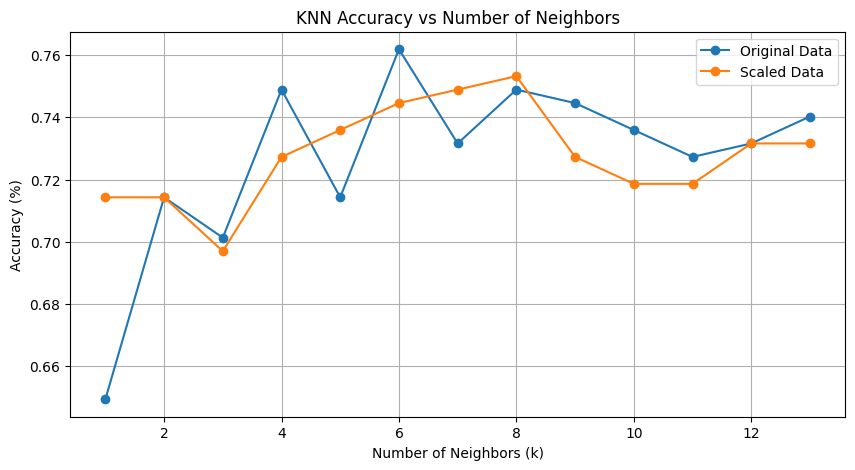

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Define k range
k_values = range(1, 14)

# Lists to store results
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

# Loop over k values
for k in k_values:
    # Original Data
    start_time = time.time()
    y_pred_orig = predict_all(X_train, y_train, X_test, k)
    end_time = time.time()

    acc_orig = accuracy(y_test, y_pred_orig)
    t_orig = end_time - start_time

    accuracy_original.append(acc_orig)
    time_original.append(t_orig)

    # Scaled Data
    start_time = time.time()
    y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
    end_time = time.time()

    acc_scaled = accuracy(y_test, y_pred_scaled)
    t_scaled = end_time - start_time

    accuracy_scaled.append(acc_scaled)
    time_scaled.append(t_scaled)

    print(f"k={k:2d} | Accuracy (Original)={acc_orig:.2f} | Accuracy (Scaled)={acc_scaled:.2f} | "
          f"Time (Original)={t_orig:.5f}s | Time (Scaled)={t_scaled:.5f}s")

#Visualize Accuracy vs k
plt.figure(figsize=(10,5))
plt.plot(k_values, accuracy_original, marker='o', label='Original Data')
plt.plot(k_values, accuracy_scaled, marker='o', label='Scaled Data')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.title("KNN Accuracy vs Number of Neighbors")
plt.grid(True)
plt.legend()
plt.show()




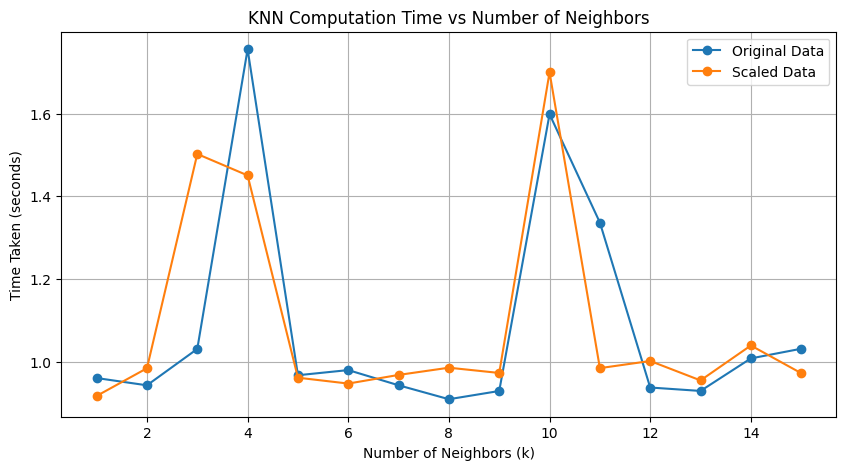

In [ ]:
#Visualize Time vs k
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original, marker='o', label='Original Data')
plt.plot(k_values, time_scaled, marker='o', label='Scaled Data')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Time Taken (seconds)")
plt.title("KNN Computation Time vs Number of Neighbors")
plt.grid(True)
plt.legend()
plt.show()
